In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\cheng\AppData\Local\Temp\ipykernel_28276\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.read_csv("BTC-USD.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,26719.291016,12711619225
1,2023-05-27,26720.181641,26888.882813,26621.140625,26868.353516,26868.353516,7892015141
2,2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578
3,2023-05-29,28075.591797,28432.039063,27563.876953,27745.884766,27745.884766,15181308984
4,2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851


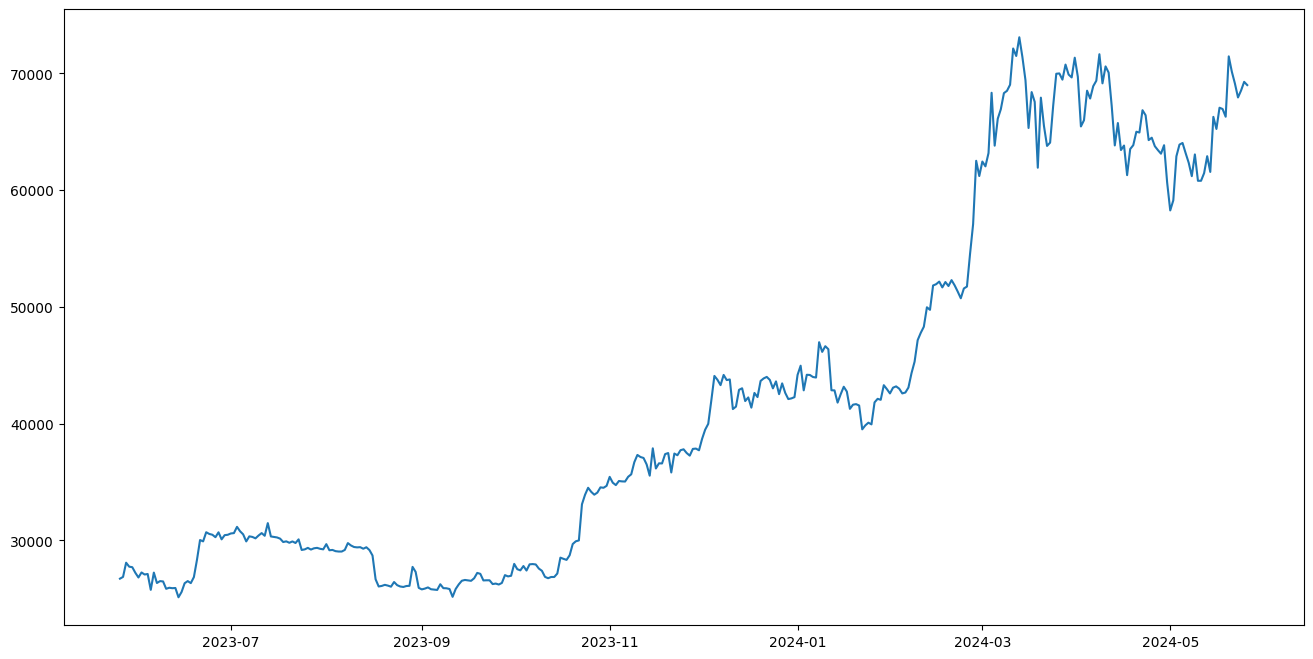

In [8]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [9]:
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

                 Date          Open          High           Low         Close  \
Date                                                                            
2023-05-26 2023-05-26  26474.181641  26916.669922  26343.949219  26719.291016   
2023-05-27 2023-05-27  26720.181641  26888.882813  26621.140625  26868.353516   
2023-05-28 2023-05-28  26871.158203  28193.449219  26802.751953  28085.646484   
2023-05-29 2023-05-29  28075.591797  28432.039063  27563.876953  27745.884766   
2023-05-30 2023-05-30  27745.123047  28044.759766  27588.501953  27702.349609   

               Adj Close       Volume  
Date                                   
2023-05-26  26719.291016  12711619225  
2023-05-27  26868.353516   7892015141  
2023-05-28  28085.646484  14545229578  
2023-05-29  27745.884766  15181308984  
2023-05-30  27702.349609  13251081851  

 Shape of the data:
(367, 7)

 Shape of training set:
(367, 2)

 Shape of validation set:
(0, 2)

 RMSE value on validation set:
nan


C:\Users\cheng\AppData\Local\Temp\ipykernel_28276\1357631891.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Date'][i] = data['Date'][i]
C:\Users\cheng\AppData\Local\Temp\ipykernel_28276\1357631891.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignme